In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#Reading the data

df_netflix_2019 = pd.read_csv('netflix_titles.csv')
df_netflix_2019.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#Data shape

df_netflix_2019.shape

(7787, 12)

In [ ]:
#Missing data

df_netflix_2019.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# Replacing categorical missing data with the Mode

mode = ''.join(df_netflix_2019['rating'].mode())
df_netflix_2019['rating'].fillna(mode, inplace=True)

In [ ]:
# No more missing data in the rating
df_netflix_2019.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#Extracting numerical duration from the duration attribute and adding minute attribute to the dataset for the Movies
df_movie = df_netflix_2019[df_netflix_2019['type']=='Movie']
df_movie = df_movie.assign(minute = df_movie['duration'].str.extract(r'(\d+)', expand=False).astype(int))


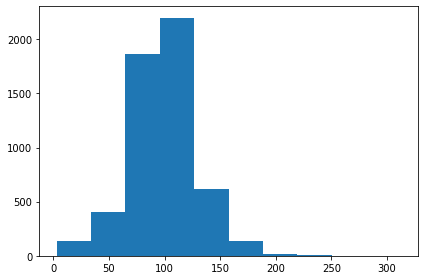

In [ ]:
#Example of plotting a histogram for numeric data
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.hist(df_movie['minute'])
fig.tight_layout()

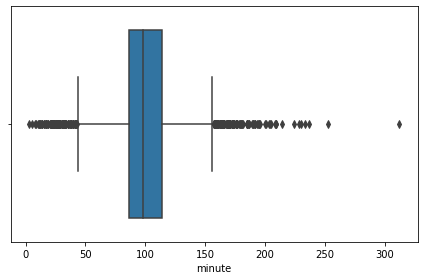

In [ ]:
# A better way to explore numeric data is to do  a boxplot to detect the outliers and the quartils

fig, ax = plt.subplots(nrows=1, ncols=1)
ax = sns.boxplot(x=df_movie['minute'])
fig.tight_layout()

In [ ]:
df_movie['minute'].describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: minute, dtype: float64

In [ ]:
# Creating a responsive plot with plotly library
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
fig = go.Figure()
fig.add_box(x=df_movie['minute'], text=df_movie['minute'])
iplot(fig)

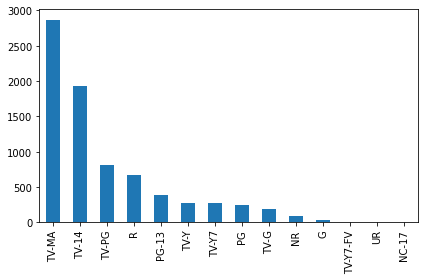

In [ ]:
#Ploting a categorical attribute with a bar plot
fig=df_netflix_2019['rating'].value_counts().plot.bar().get_figure()
fig.tight_layout()

In [ ]:
#filtering outliers out (detected from the boxplot)
df_movie = df_movie[(df_movie['minute']>43) & (df_movie['minute']<158)]

In [ ]:
df_movie.shape

(5046, 13)

In [ ]:
df_netflix_originals = pd.read_csv('netflix_originals.csv')
df_netflix_originals.dtypes

titles          object
years            int64
genres          object
imdb           float64
runtime         object
description     object
stars           object
votes           object
type            object
original        object
dtype: object

In [ ]:
#Dealing with different column names before merging datasets
df_netflix_originals.rename(columns={'titles':'title', 'years':'release_year'}, inplace=True)


In [ ]:
#Dealing with different data types before the merger
df_netflix_originals = df_netflix_originals.astype({"release_year": int})


In [ ]:
df_netflix_2019.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#Lower case

df_netflix_originals['title'] = df_netflix_originals['title'].apply(lambda x:x.lower())

#or

df_netflix_originals['title'] = df_netflix_originals['title'].str.lower()
df_netflix_originals['title']

0                                   zumbo's just desserts
1                                               zona rosa
2                                         young wallander
3                                            you vs. wild
4                                                     you
                              ...                        
1512                                  ralphie may: unruly
1513                               john hodgman: ragnarok
1514                           jimmy carr: funny business
1515               anthony jeselnik: thoughts and prayers
1516    13th: a conversation with oprah winfrey & ava ...
Name: title, Length: 1517, dtype: object

In [ ]:
#Stripping the spaces

df_netflix_originals['title'] = df_netflix_originals['title'].apply(lambda x:x.strip())

#Or

df_netflix_originals['title'] = df_netflix_originals['title'].str.strip()

df_netflix_originals['title']

0                                   zumbo's just desserts
1                                               zona rosa
2                                         young wallander
3                                            you vs. wild
4                                                     you
                              ...                        
1512                                  ralphie may: unruly
1513                               john hodgman: ragnarok
1514                           jimmy carr: funny business
1515               anthony jeselnik: thoughts and prayers
1516    13th: a conversation with oprah winfrey & ava ...
Name: title, Length: 1517, dtype: object

In [ ]:
# remove punctuation: clean characters other than word or spaces
df_netflix_originals['title'].replace('[^\w\s]', '', regex=True, inplace=True)

In [ ]:
#Merging two different datasets on some columns
df_netflix = pd.merge(df_netflix_originals, df_netflix_2019, on=['title', 'type', 'release_year'],
                           how='outer')

In [ ]:
df_netflix

,title,release_year,genres,imdb,runtime,description_x,stars,votes,type,original,show_id,director,cast,country,date_added,rating,duration,listed_in,description_y
0,zumbos just desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zona rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,young wallander,2020,"Crime, Drama, Mystery",6.7,NaN,Follow recently graduated police officer Kurt ...,"Adam Pålsson, Leanne Best, Richard Dillane, El...","5,419",TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,you vs wild,2019,"Adventure, Reality-TV",6.7,20 min,"In this interactive series, you'll make key de...",Bear Grylls,"1,977",TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,you,2018,"Crime, Drama, Romance",7.8,45 min,"A dangerously charming, intensely obsessive yo...","Penn Badgley, Victoria Pedretti, Ambyr Childer...","134,932",TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9295,Zozo,2005,NaN,NaN,NaN,NaN,NaN,NaN,Movie,NaN,s7783,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
9296,Zubaan,2015,NaN,NaN,NaN,NaN,NaN,NaN,Movie,NaN,s7784,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
9297,Zulu Man in Japan,2019,NaN,NaN,NaN,NaN,NaN,NaN,Movie,NaN,s7785,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
9298,Zumbo's Just Desserts,2019,NaN,NaN,NaN,NaN,NaN,NaN,TV Show,NaN,s7786,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
#Filling Catalog for non original netflix Movies
df_netflix['original'].fillna('Catalog', inplace=True)


In [ ]:
#drop_duplicates: data duplicated because of disagreement in release_year
df_netflix.drop_duplicates(['title'], keep='first', inplace=True)

In [ ]:
df_netflix[['original', 'type']].value_counts()

original  type   
Catalog   Movie      5375
          TV Show    2408
Netflix   TV Show    1009
          Movie       504
dtype: int64